# RESEARCH: <font color="#C70039">Momentary Frequency Estimator</font>

* Author: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Start implementation: 26-11-2020
* Description: Computation of the momentary frequency of a given signal s

TODOS
* convert to matlab code in order to be integrated into AdAnalyzer Project

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
#import os, glob
import matplotlib.pyplot as plt

In [2]:
# in and out directories
data_in_folder = "./data/" 
data_out_folder = "./results/" 

In [3]:
# works with an artifically generated signal which is a sine function with three different frequencies.
# read the signal
infile = "signal"

df_signal=pd.read_csv(data_in_folder + infile + ".csv", header=None)

print(df_signal.head())
#df_signal.rename(columns={0:'huhu'}, inplace=True)
print(df_signal.head())

          0
0  0.000000
1  0.049979
2  0.099833
3  0.149438
4  0.198669
          0
0  0.000000
1  0.049979
2  0.099833
3  0.149438
4  0.198669


In [4]:
'''
# take a real EEG of a test person with all electrodes 
infile = "EEG-testperson"

df_signal=pd.read_csv(data_in_folder + infile + ".csv", sep=";", nrows=75000,
                      usecols=['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4'])

print(df_signal.head())
'''

'\n# take a real EEG of a test person with all electrodes \ninfile = "EEG-testperson"\n\ndf_signal=pd.read_csv(data_in_folder + infile + ".csv", sep=";", nrows=75000,\n                      usecols=[\'AF3\',\'F7\',\'F3\',\'FC5\',\'T7\',\'P7\',\'O1\',\'O2\',\'P8\',\'T8\',\'FC6\',\'F4\',\'F8\',\'AF4\'])\n\nprint(df_signal.head())\n'

Visualize the signal

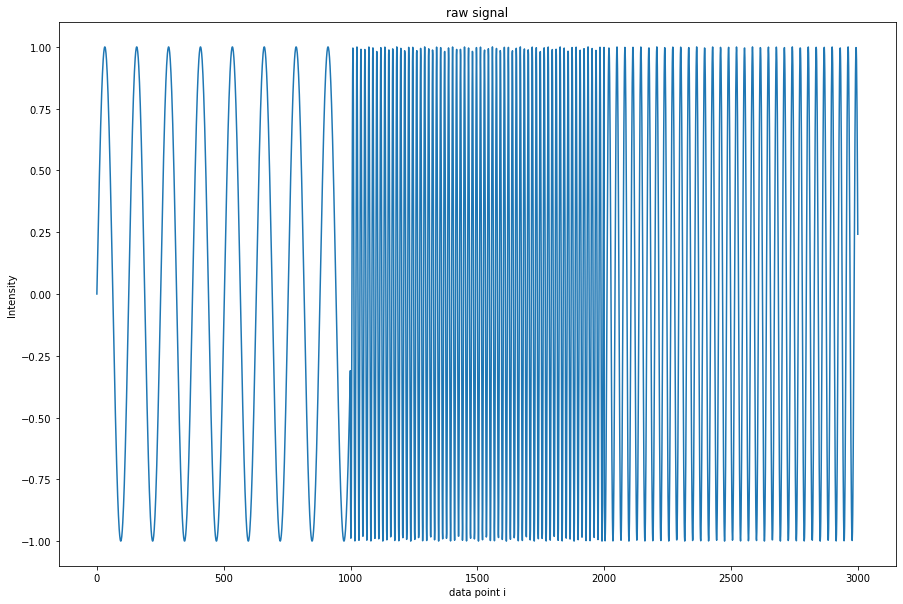

In [5]:
plt.figure(figsize=(15,10))
plt.plot(df_signal)
plt.title('raw signal')
plt.ylabel('Intensity')
plt.xlabel('data point i')
plt.show()

Vergleichsoperatoren:
* #define K(x,y) ((x) < (y) ? 0:1) --- ergibt 0, wenn x kleiner ist als y und sonst 1
* #define W(x,y) ((x) != (y) ? 1:0)--- ergibt 1, wenn x ungleich y ist und sonst 0

In [6]:
# important 
def K(x,y):
    if x < y:
        return 0
    else:
        return 1
    
def W(x,y):
    if x != y:
        return 1
    else:
        return 0

In [7]:
def mean_operator(datapoint, oldMeanValue, adaption_const):
    newMeanValue = 0.0
  
    newMeanValue = oldMeanValue + adaption_const * (datapoint - oldMeanValue)
  
    return newMeanValue

In [8]:
def frequency_estimation(signalData, tMean, tFreq):
       
    sig_len = len(signalData)
    
    resultFreq = []
    
    mean1=mean2=mean3 = 0.0
    
    for i in range(2, sig_len):
        mean1 = mean_operator(signalData.iloc[:,0][i], mean1, tMean)
        
        # check with the "bigger"-operator
        k1 = K(mean1, signalData.loc[:,0][i-1])

        mean2 = mean_operator(signalData.iloc[:,0][i-1], mean2, tMean)
        
        # check with the "bigger"-operator
        k2 = K(mean2, signalData.iloc[:,0][i-2])

        # check with the "equal"-operator
        w = W(k1,k2)
        
        mean3 = mean_operator(w, mean3, tFreq)
        
        # Just count half of the zero-crossings => /2
        resultFreq.append(mean3/2)
    
    return resultFreq

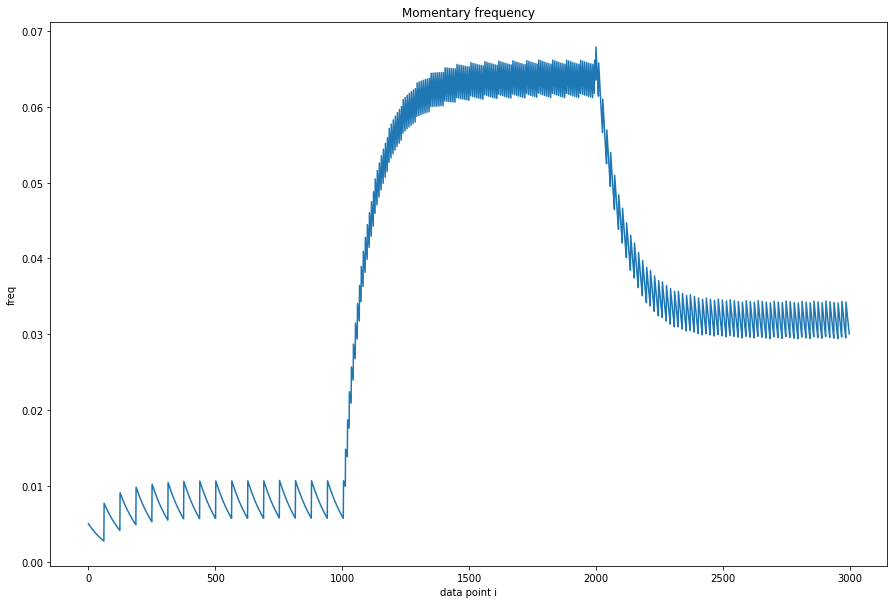

In [13]:
# just take one of the electrodes
# to_frame is necessary because taking one column converts df into series, 
# so to_frame() converts back to df
#df_signal_single_elec = df_signal["AF3"].to_frame() 
# get rid of the header name
#df_signal_single_elec.rename(columns={'AF3':''}, inplace=True)

#print(df_signal_single_elec.head())

#resultFreq = frequency_estimation(df_signal_single_elec, 0.0001, 0.01) 
resultFreq = frequency_estimation(df_signal, 0.0001, 0.01) 

plt.figure(figsize=(15,10))
plt.plot(resultFreq)
plt.title('Momentary frequency')
plt.ylabel('freq')
plt.xlabel('data point i')
plt.show()

smoothing the signal by simple averaging

Nachteil: DAs geglättet Signal hängt hinterher und sieht es aus, als würde der Transientenzeitpunkt später eintreten, da die  Momentanfrequenz später reagiert. 

In [ ]:
from pandas import DataFrame

smooth_freq = DataFrame(resultFreq)

plt.figure(figsize=(15,10))
plt.plot(smooth_freq.rolling(100).mean())
plt.title('Momentary frequency')
plt.ylabel('freq')
plt.xlabel('data point i')
plt.show()


In [ ]:
#create a dataframe with two columns named Foo and BAR 
df = pd.DataFrame({" Foo": [1, 2, 3], "BAR ": [4, 5, 6]}) 
print(df)

#rename the columns in the dataframe to strip whitespace and be all lowercase: 
df = df.rename(columns={c:c.strip().lower() for c in df.columns}) 
print(df)

#change the column named foo to moo, and change the column named bar to baz 
df = df.rename(columns={"foo": "", "bar": ""}) 
print(df) 

write the frequency into a csv file